<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Reto_1_VSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descripción de las Variables de la Base de Datos
Base de Datos tomada de: https://www.datos.gov.co/Comercio-Industria-y-Turismo/Registro-Nacional-de-Turismo-departamento-del-Choc/9qqa-bbm5/about_data

**ANO**: Año al que corresponde el registro nacional de turismo

**MES:** Número del mes a que corresponde el Registro Nacional de Turismo

**CODIGO_RNT:** Número del Registro Nacional de Turismo

**COD_MUN:** Código Divipola del municipio establecido por el DANE

**COD_DPTO:** Código Divipola del departamento establecido por el DANE

**ESTADO_RNT:** Estado actual en el cual se encuentra el Registro Nacional de Turismo del Establecimiento

**RAZON_SOCIAL_ESTABLECIMIENTO:** Nombre del establecimiento

**DEPARTAMENTO:** Nombre del departamento de Colombia

**MUNICIPIO:** Nombre del municipio de Colombia

**CATEGORIA:** Describen genéricamente las actividades turísticas, ej.: agencia de viajes, establecimiento de alojamiento y hospedaje, entre otros.

**SUB_CATEGORIA:** Refieren actividades turísticas específicas pertenecientes a la actividad genérica, ej.: agencia de viajes y turismo, agencia de viajes mayorista, hotel, apartahotel, etc.

**HABITACIONES:** Número de habitaciones con las cuales cuenta (si aplica)

**CAMAS:** Número de camas totales con las cuales cuenta (si aplica)

**NUM_EMP:** Número total de empleados que conforman el establecimiento (si aplica)


#**0. Cargamos Librerias**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Cargamos Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**1. Cargamos la Base de Datos**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aprendizaje Supervisado/Registro_Nacional_de_Turismo_-_departamento_del_Choc__20240826.csv')
df.head()

,ANO,MES,CODIGO_RNT,COD_MUN,COD_DPTO,ESTADO_RNT,RAZON_SOCIAL_ESTABLECIMIENTO,DEPARTAMENTO,MUNICIPIO,CATEGORIA,SUB_CATEGORIA,HABITACIONES,CAMAS,NUM_EMP
0,2024,3,2538,27075,27,ACTIVO,HOTEL PLAYA DE ORO,CHOCO,BAHIA SOLANO,ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,HOTEL,27,70,7
1,2024,3,2567,27006,27,ACTIVO,TACARCUNA LODGE,CHOCO,ACANDI,ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,HOTEL,35,100,6
2,2024,3,4309,27075,27,ACTIVO,ECOLODGE EL ALMEJAL S.A.S.,CHOCO,BAHIA SOLANO,ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,HOTEL,12,40,5
3,2024,3,5249,27001,27,ACTIVO,VIAJES TRUANDO LIMITADA,CHOCO,QUIBDO,AGENCIAS DE VIAJES,AGENCIA DE VIAJES Y DE TURISMO,0,0,3
4,2024,3,6333,27001,27,ACTIVO,CORTES & CIA SAS,CHOCO,QUIBDO,AGENCIAS DE VIAJES,AGENCIA DE VIAJES Y DE TURISMO,0,0,2


#**2. Organizamos y Revisamos los Datos**

Para este caso las variables predictoras serán 'HABITACIONES', 'NUM_EMP' y 'CATEGORIA', y la variable a predecir será la 'CAMAS'. Para esto, eliminaremos todas aquellas columnas que nos hacen ruido, y cambiaremos la variable categórica 'CATEGORIA' a dummy. Finalmente, revisaremos los datos para buscar datos nulos o atípicos dentro de la base de datos.

In [ ]:
df.columns

Index(['ANO', 'MES', 'CODIGO_RNT', 'COD_MUN', 'COD_DPTO', 'ESTADO_RNT',
       'RAZON_SOCIAL_ESTABLECIMIENTO', 'DEPARTAMENTO', 'MUNICIPIO',
       'CATEGORIA', 'SUB_CATEGORIA', 'HABITACIONES', 'CAMAS', 'NUM_EMP'],
      dtype='object')

In [ ]:
#Borramos las variables que nos hacen ruido
data= df.drop(labels=['ANO', 'RAZON_SOCIAL_ESTABLECIMIENTO', 'MES', 'CODIGO_RNT', 'COD_MUN', 'COD_DPTO', 'ESTADO_RNT', 'DEPARTAMENTO', 'MUNICIPIO',
       'SUB_CATEGORIA'], axis=1)
data.head()

,CATEGORIA,HABITACIONES,CAMAS,NUM_EMP
0,ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,27,70,7
1,ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,35,100,6
2,ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,12,40,5
3,AGENCIAS DE VIAJES,0,0,3
4,AGENCIAS DE VIAJES,0,0,2


##Cambiamos la variable categórica 'CATEGORIA' a dummy

In [ ]:
data = pd.get_dummies(data, columns=['CATEGORIA'])
data.head()

,HABITACIONES,CAMAS,NUM_EMP,CATEGORIA_AGENCIAS DE VIAJES,CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR,CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA,CATEGORIA_GUIAS DE TURISMO,CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA,CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES,CATEGORIA_VIVIENDAS TURÍSTICAS
0,27,70,7,False,False,True,False,False,False,False,False
1,35,100,6,False,False,True,False,False,False,False,False
2,12,40,5,False,False,True,False,False,False,False,False
3,0,0,3,True,False,False,False,False,False,False,False
4,0,0,2,True,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

,0
HABITACIONES,0
CAMAS,0
NUM_EMP,0
CATEGORIA_AGENCIAS DE VIAJES,0
CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR,0
CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,0
CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA,0
CATEGORIA_GUIAS DE TURISMO,0
CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA,0
CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES,0


No existen datos faltantes dentro de esta base de datos por ende no se necesita utilizar la función 'dropna'

In [ ]:
data.describe()

,HABITACIONES,CAMAS,NUM_EMP
count,479.000000,479.000000,479.000000
mean,8.010438,15.073069,1.083507
std,10.075961,16.926029,3.423601
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,0.000000
50%,5.000000,11.000000,0.000000
75%,10.000000,19.000000,1.000000
max,86.000000,120.000000,40.000000


Viendo la descripción de las variables escogidas, vemos que en ninguna de las tres, hay algún dato atípico visible teniendo en cuenta que hablamos del departamento del Chocó y de establecimientos turísticos. Pero, vamos a revisarlas por medio de gráficas para tener más certeza. Y al final haremos todos los filtros necesarios.

In [ ]:
#Copiamos la información de data en data1
data1 = data.copy()

###**Categoria**

Para esta variable que antes era categórica, vamos a eliminar aquellas columnas que no tengan una cantidad de datos relevantes.

In [ ]:
#'CATEGORIA_AGENCIAS DE VIAJES'
data1['CATEGORIA_AGENCIAS DE VIAJES'].value_counts()

,count
CATEGORIA_AGENCIAS DE VIAJES,
False,400
True,79


In [ ]:
#'CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR'
data1['CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR'].value_counts()

,count
CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR,
False,478
True,1


In [ ]:
#'CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO'
data1['CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO'].value_counts()

,count
CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,
False,283
True,196


In [ ]:
#'CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA'
data1['CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA'].value_counts()

,count
CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA,
False,476
True,3


In [ ]:
#'CATEGORIA_GUIAS DE TURISMO'
data1['CATEGORIA_GUIAS DE TURISMO'].value_counts()

,count
CATEGORIA_GUIAS DE TURISMO,
False,477
True,2


In [ ]:
#'CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA'
data1['CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA'].value_counts()

,count
CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA,
False,478
True,1


In [ ]:
#'CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES'
data1['CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES'].value_counts()

,count
CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES,
False,478
True,1


In [ ]:
#'CATEGORIA_VIVIENDAS TURÍSTICAS'
data1['CATEGORIA_VIVIENDAS TURÍSTICAS'].value_counts()

,count
CATEGORIA_VIVIENDAS TURÍSTICAS,
False,283
True,196


Se eliminaran las siguientes columnas, ya que cuentan con pocos datos (1,3):

'CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES', 'CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA', 'CATEGORIA_GUIAS DE TURISMO', 'CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA', 'CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR'.

In [ ]:
#Se eliminan las columnas previamente descritas
data1 = data1.drop(labels=['CATEGORIA_OPERADORES PROFESIONALES DE CONGRESOS FERIAS Y CONVENCIONES', 'CATEGORIA_OFICINAS DE REPRESENTACION TURÍSTICA', 'CATEGORIA_GUIAS DE TURISMO',
                           'CATEGORIA_ESTABLECIMIENTOS DE GASTRONOMÍA', 'CATEGORIA_EMPRESAS DE TRANSPORTE TERRESTRE AUTOMOTOR'], axis=1)
data1.head()

,HABITACIONES,CAMAS,NUM_EMP,CATEGORIA_AGENCIAS DE VIAJES,CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,CATEGORIA_VIVIENDAS TURÍSTICAS
0,27,70,7,False,True,False
1,35,100,6,False,True,False
2,12,40,5,False,True,False
3,0,0,3,True,False,False
4,0,0,2,True,False,False


###**Habitaciones**

<Axes: >

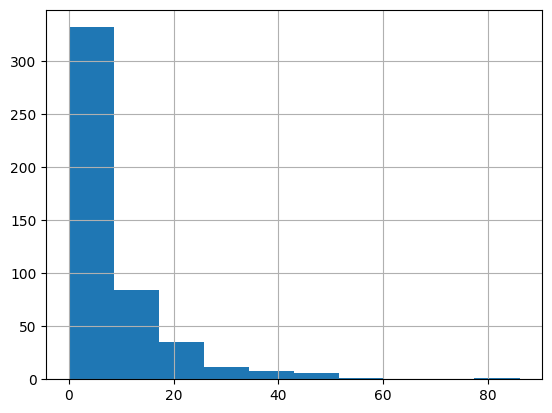

In [ ]:
#Hacemos un Histograma
data1['HABITACIONES'].hist()

In [ ]:
#Contamos cuantos datos hay en cada categoría de número de habitaciones
data1['HABITACIONES'].value_counts()

,count
HABITACIONES,
0,87
1,53
4,34
5,33
8,31
6,27
3,26
7,23
10,21


<Axes: >

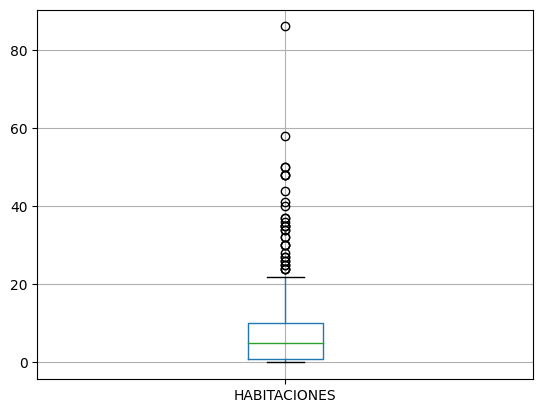

In [ ]:
#Diagrama de Cajas y Bigotes
data1.boxplot(column = 'HABITACIONES')

Para este caso vemos que el número de habitaciones tiene un rango de (0,20) en el departamento del Chocó. Además notamos pocos datos después del 20, es por eso que estos datos los vamos a considerar atípicos y los eliminaremos en este caso.

In [ ]:
#Filtramos los datos
data1 = data1[data1['HABITACIONES'] <20]

<Axes: >

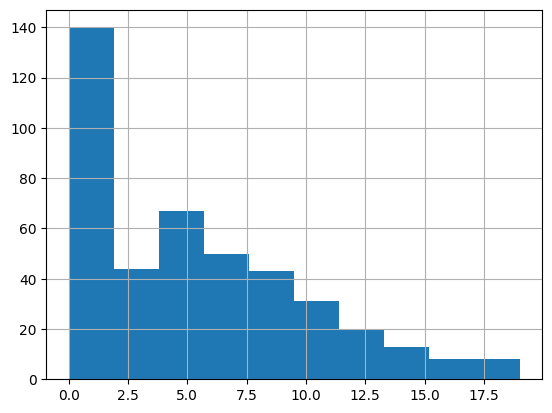

In [ ]:
#Hacemos un Histograma
data1['HABITACIONES'].hist()

<Axes: >

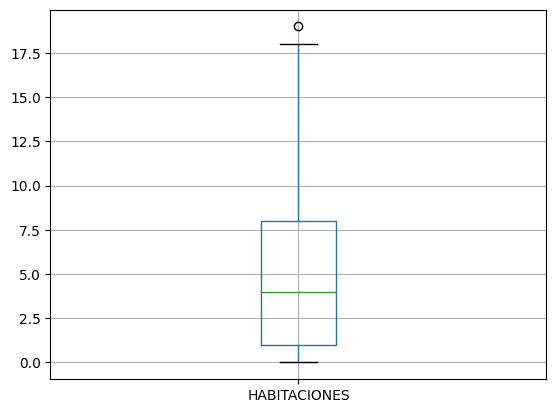

In [ ]:
#Diagrama de Cajas y Bigotes
data1.boxplot(column = 'HABITACIONES')

###**Camas**

<Axes: >

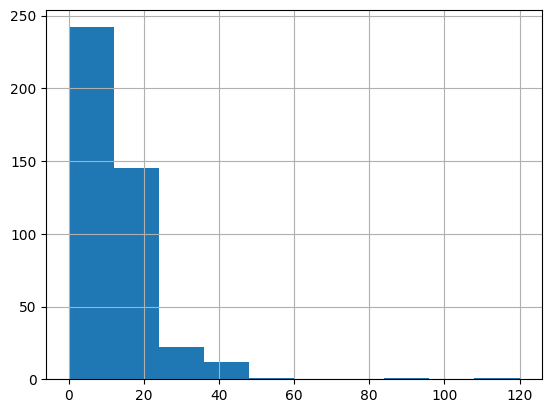

In [ ]:
#Hacemos un Histograma
data1['CAMAS'].hist()

In [ ]:
#Relizamos el conteo de la varible CAMAS
data1['CAMAS'].value_counts()

,count
CAMAS,
0,87
10,40
12,25
15,24
14,22
8,20
5,18
6,17
18,15


<Axes: >

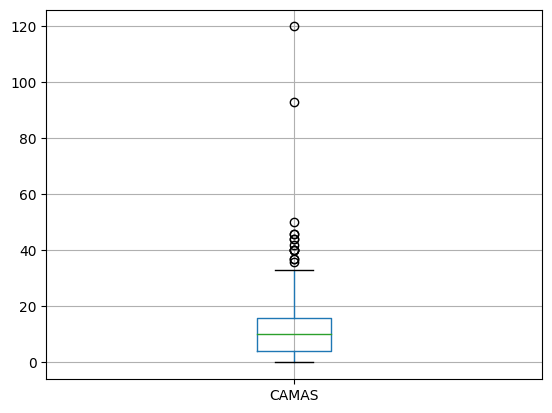

In [ ]:
#Diagrama de Cajas y Bigotes
data1.boxplot(column = 'CAMAS')

Aquí notamos que hay pocos establecimientos turísticos que cuentan con más de 30 camas es por eso que los eliminaremos para tener datos más precisos.

In [ ]:
#Creamos un filtro en la variable 'CAMAS'
data1 = data1[data1['CAMAS'] <30]

<Axes: >

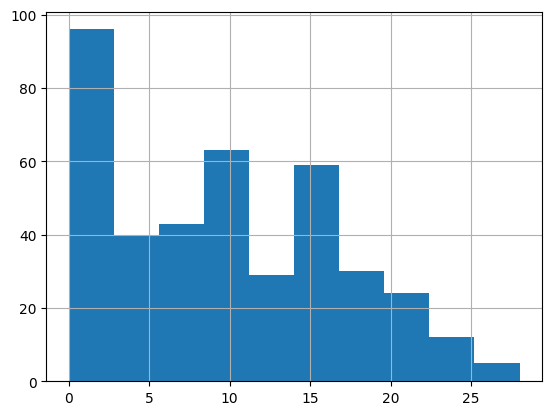

In [ ]:
#Histograma
data1['CAMAS'].hist()

<Axes: >

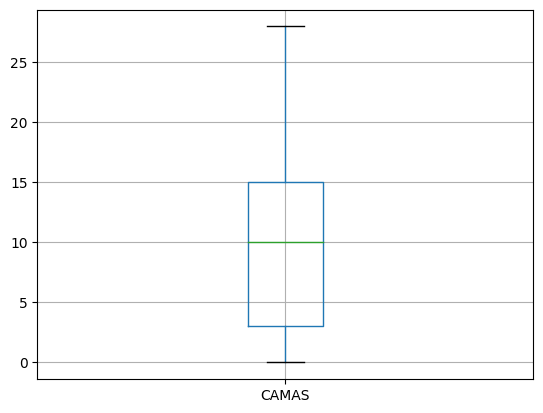

In [ ]:
#Diagrama de Cajas y Bigotes
data1.boxplot(column = 'CAMAS')

###**Número de Empleados**

<Axes: >

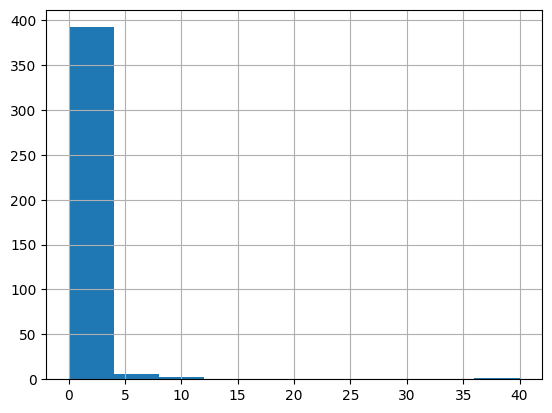

In [ ]:
#Relizamos un Histograma
data1['NUM_EMP'].hist()

In [ ]:
#Revisamos el conteo de las datos dentro de NUM_EMP
data1['NUM_EMP'].value_counts()

,count
NUM_EMP,
0,277
1,67
2,32
3,16
4,3
6,2
8,2
5,1
40,1


<Axes: >

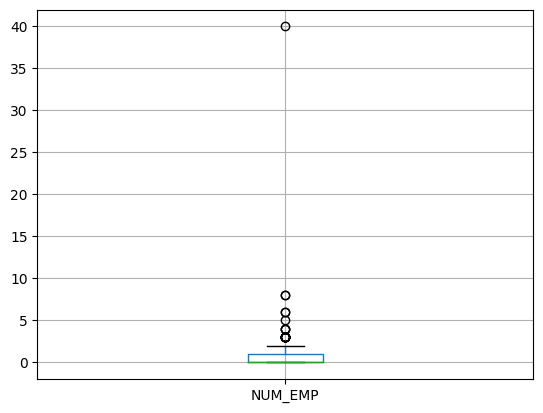

In [ ]:
#Diagrama de Cajas y Bigotes
data1.boxplot(column = 'NUM_EMP')

Para este caso, si bien notamos que hay muy pocos empleados para cada establecimiento, vamos a borrar aquellos que tengan mayor a 4 empleados.

In [ ]:
#Realizamos el filtro corresponediente
data1 = data1[data1['NUM_EMP'] <=4]

<Axes: >

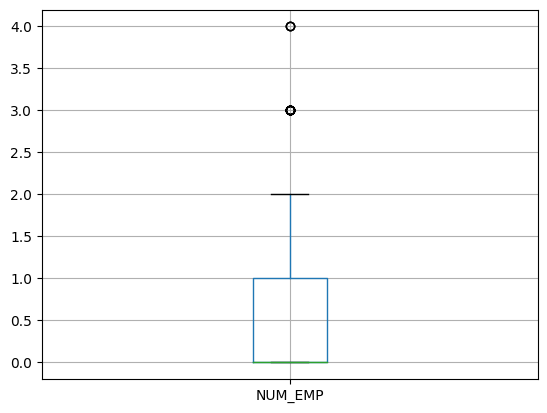

In [ ]:
#Hacemos el diagrama de cajas y bigotes
data1.boxplot(column = 'NUM_EMP')

In [ ]:
data1.head()

,HABITACIONES,CAMAS,NUM_EMP,CATEGORIA_AGENCIAS DE VIAJES,CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,CATEGORIA_VIVIENDAS TURÍSTICAS
3,0,0,3,True,False,False
4,0,0,2,True,False,False
7,1,16,0,False,False,True
8,18,27,0,False,True,False
9,6,18,0,False,True,False


#**3. Separamos los datos entre train y test**

In [ ]:
#Cantidad de datos en data1
data1.shape

(395, 6)

In [ ]:
#Tomamos las variables predictoras en X y la variable a predecir en y

#Variables Predictoras
X = data1.drop(labels=['NUM_EMP'], axis=1)

#Variable a Predecir
y = data1['NUM_EMP']

In [ ]:
#Separamos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#**4. Modelo de Regresión Múltiple**

##4.1. Sin Prepocesamiento

In [ ]:
#Copiamos X_train en X_train1 para evitar algún problema más adelante con el resto de modelo
X_train1 = X_train.copy()

In [ ]:
#Hacemos lo mismo con y_train
y_train1 = y_train.copy()

In [ ]:
#Revisamos las dimensiones de X
X_train1.shape

(316, 5)

In [ ]:
#Revisamos las dimensiones de y
y_train1.shape

(316,)

In [ ]:
#Haremos el modelo más sencillo
model = LinearRegression(fit_intercept=True) #Instanciamos el modelo
model.fit(X_train1,y_train1) #Entrenamos el modelo

LinearRegression()

In [ ]:
#Miramos el score para saber el rendimiento del modelo
model.score(X_train1,y_train1)

0.10619848262691722

El modelo tiene muy buen ajuste.

*Se hace el modelo con los datos test*

In [ ]:
#Se crea una copia tanto de X_test como de y_test a X_test1 y y_test1
X_test1 = X_test.copy()
y_test1 = y_test.copy()

In [ ]:
#Se revisan los tamaños de X_test1 y y_test1
print(X_test1.shape)
print(y_test1.shape)

(79, 5)
(79,)


In [ ]:
#Haremos el modelo más sencillo que será un polinomio de grado 1
model = LinearRegression(fit_intercept=True) #Instanciamos el modelo
model.fit(X_test1,y_test1) #Entrenamos el modelo

LinearRegression()

In [ ]:
#Miramos el score para saber el rendimiento del modelo
model.score(X_test1,y_test1)

0.09731160158150565

##4.2. Con Preprocesamiento

In [ ]:
#Para realizar el modelo de regresión multiple con preprocesamiento, llamaremos las variables X_train2, y_train2, X_test2 y y_test2
X_train2 = X_train.copy()
y_train2 = y_train.copy()
X_test2 = X_test.copy()
y_test2 = y_test.copy()

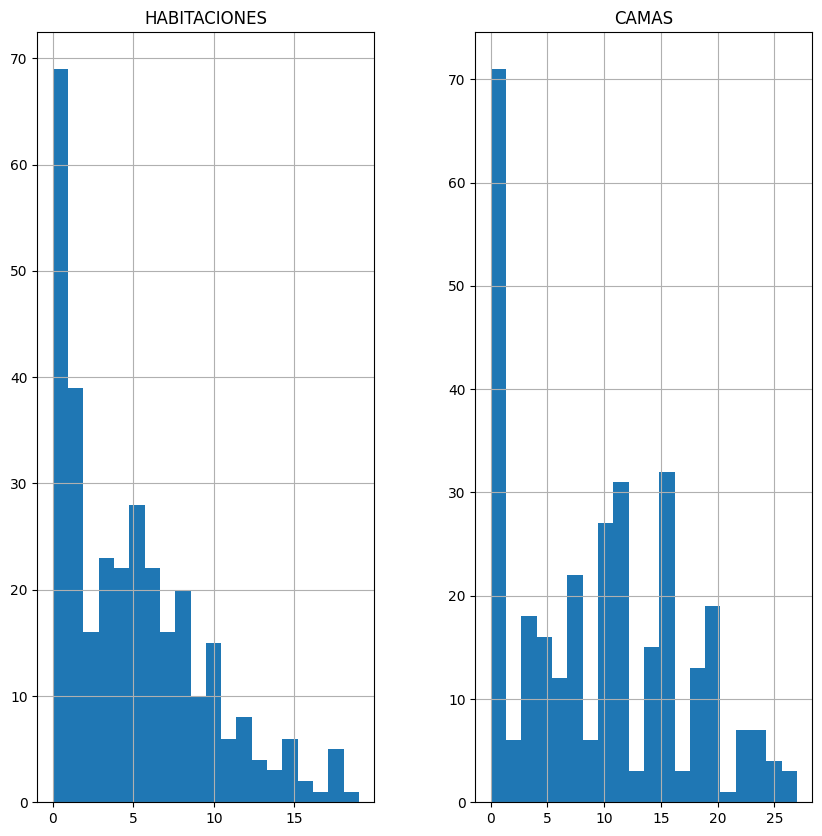

In [ ]:
#Revisamos los histogramas como aproximación a la distribución de probabilidad de cada una de las características de entrenamiento (variables predictoras)
X_train2.hist(figsize = (10,10), bins = 20);

Para las variable *HABITACIONES*, notamos que tiene una distribución por sesgo, por ello es mejor aplicar una transformación logarítmica ('PowerTransformer'). Y para la variable *CAMAS* utilizaremos Máximos y Mínimo.

In [ ]:
#Definimos las librerias para el prepocesamiento
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

#Instanciamos los prepocesadores
power = PowerTransformer()
minmax = MinMaxScaler()

#Definimos las listas de variables para cada uno de los casos
features_power = ['HABITACIONES']
features_minmax = ['CAMAS']

#Aplicamos el prepocesamiento
X_power = power.fit_transform(X[features_power])
X_minmax = minmax.fit_transform(X[features_minmax])

#Concatenamos todas las variables nuevamente en una sola X
X_pre = np.concatenate((X_minmax, X_power, X[['CATEGORIA_AGENCIAS DE VIAJES']], X[['CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO']], X[['CATEGORIA_VIVIENDAS TURÍSTICAS']]), axis = 1)

In [ ]:
#Aplicamos la regularización en la regresión como anteriormente
X_train_p2, X_test_p2, y_train_p2, y_test_p2 = train_test_split(X_pre, y,
                                                    test_size= 0.2,
                                                    random_state= 2)
#Instanciamos el Modelo
model = LinearRegression(fit_intercept=True)

#Entrenamos el modelo
model.fit(X_train_p2,y_train_p2)

#Calculamos el score
model.score(X_train_p2,y_train_p2)

0.10598181537967521

*Hacemos con los datos de prueba*

In [ ]:
#Ahora los hacemos con los datos de prueba
#Instanciamos el Modelo
model = LinearRegression(fit_intercept=True)

#Entrenamos el modelo
model.fit(X_test_p2,y_test_p2)

#Calculamos el score
model.score(X_test_p2,y_test_p2)

0.10464991158533643

#**5. Modelo de regresión con regularización Ridge**

##Sin Preprocesamiento

In [ ]:
#Importamos librerias adicionales
from sklearn.linear_model import Ridge #para el modelo de regresión Ridge
from sklearn.metrics import mean_squared_error #para calcular el RMSE
from sklearn.model_selection import train_test_split #para dividir el conjunto de entrenamiento y prueba
from sklearn.model_selection import GridSearchCV

In [ ]:
#Para ignorar los warning
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Creamos la copia del X_train, y_train, X_test, y_test
X_train3 = X_train.copy()
y_train3 = y_train.copy()
X_test3 = X_test.copy()
y_test3 = y_test.copy()

In [ ]:
#Revisamos X
X_train3.shape

(316, 5)

In [ ]:
#Revisamos y
y_train3.shape

(316,)

In [ ]:
#Instanciamos el modelo
model =Ridge()

#Creamos el diccionario
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_result = grid_search.fit(X_train3, y_train3)

In [ ]:
#Mostramos el mejor RMSE con el hiperparámetro sintonizado
print(f'El mejor RMSE fue de {-grid_result.best_score_:.2f}, con un lambda de {grid_result.best_params_["alpha"]}')

El mejor RMSE fue de 0.72, con un lambda de 0.015998587196060572


*Ahora evaluamos el modelo con los datos de prueba (test)*

In [ ]:
#Instanciamos el modelo
model =Ridge()

#Creamos el diccionario
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_result = grid_search.fit(X_test3, y_test3)

In [ ]:
#Mostramos el mejor RMSE con el hiperparámetro sintonizado
print(f'El mejor RMSE fue de {-grid_result.best_score_:.2f}, con un lambda de {grid_result.best_params_["alpha"]}')

El mejor RMSE fue de 0.65, con un lambda de 75.43120063354607


## Con Preprocesamiento

In [ ]:
#Creamos la copia del X_train, y_train, X_test, y_test
X_train4 = X_train.copy()
y_train4 = y_train.copy()
X_test4 = X_test.copy()
y_test4 = y_test.copy()

In [ ]:
#Como ya hicimos el preprocesamiento arriba solamente hacemos el modelo

#Aplicamos la regularización en la regresión como anteriormente
X_train_p4, X_test_p4, y_train_p4, y_test_p4 = train_test_split(X_pre, y,
                                                    test_size= 0.2,
                                                    random_state= 2)
#Instanciamos el modelo
model = Ridge()

#Armamos el grid para escoger el lambda (alpha)
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_search.fit(X_train_p4, y_train4)

#Imprimimos el mejor score
print(f'El mejor RMSE fue de {-grid_search.best_score_:.2f}, con un lambda de {grid_search.best_params_["alpha"]}')

El mejor RMSE fue de 0.72, con un lambda de 0.2682695795279725


*Ahora lo hacemos con los datos de prueba (test)*

In [ ]:
#Instanciamos el modelo
model = Ridge()

#Armamos el grid para escoger el lambda (alpha)
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_search.fit(X_test_p4, y_test4)

#Imprimimos el mejor score
print(f'El mejor RMSE fue de {-grid_search.best_score_:.2f}, con un lambda de {grid_search.best_params_["alpha"]}')

El mejor RMSE fue de 0.66, con un lambda de 18.420699693267164


#**6. Modelo de Regresión con Regularización Lasso**

## Sin Preprocesamiento

In [ ]:
#Creamos la copia del X_train, y_train, X_test, y_test
X_train5 = X_train.copy()
y_train5 = y_train.copy()
X_test5 = X_test.copy()
y_test5 = y_test.copy()

In [ ]:
#Importamos el modelo Lasso
from sklearn.linear_model import Lasso

#Inicializar la lista de coeficientes
coeficientes = []

#Definimos los posibles valores que puede tomar lambda (alpha)
alphas = [0, 0.01, 0.1, 1, 10, 100]

#Creamos el ciclo/bucle para la sintonización de lambda (alpha)
for i in alphas: #alpha es una variable temporal
  #Instanciamos el modelo
  model = Lasso(alpha = i)

  #Entrenamos el modelo
  model.fit(X_train5, y_train5)
  #Guardamos coeficientes
  coeficientes.append(model.coef_)

#Creamos una tabla con los coeficientes de las características para analizar la contribución de cada una de ellas a la regresión
df_lasso = pd.DataFrame(data = coeficientes,
                        columns = model.feature_names_in_,
                        index = alphas)

#Mostramos la tabla
df_lasso

,HABITACIONES,CAMAS,CATEGORIA_AGENCIAS DE VIAJES,CATEGORIA_ESTABLECIMIENTOS DE ALOJAMIENTO TURÍSTICO,CATEGORIA_VIVIENDAS TURÍSTICAS
0.00,-0.007013,0.027137,0.777778,0.375734,-0.012409
0.01,-0.003094,0.025219,0.378934,0.000000,-0.336263
0.10,0.000000,0.006762,0.000000,0.000000,-0.080956
1.00,0.000000,0.000000,0.000000,0.000000,-0.000000
10.00,0.000000,0.000000,0.000000,0.000000,-0.000000
100.00,0.000000,0.000000,0.000000,0.000000,-0.000000


Vamos a tomar el valor de diferentes lambda (alpha) para ver cual me arrojá un error cuadrático medio menor.

In [ ]:
#En este caso, entrenaremos con alpha = 0.10

model= Lasso(alpha = 0.10)

#Entrenamos el modelo
model.fit(X_train5, y_train5)

#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train5, model.predict(X_train5))
test_error = mean_squared_error(y_test5, model.predict(X_test5))

#Mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 0.75
El error cuadrático medio para el conjunto de prueba es 0.64


In [ ]:
#En este caso, entrenaremos con alpha = 1

model= Lasso(alpha = 1)

#Entrenamos el modelo
model.fit(X_train5, y_train5)

#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train5, model.predict(X_train5))
test_error = mean_squared_error(y_test5, model.predict(X_test5))

#Mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 0.77
El error cuadrático medio para el conjunto de prueba es 0.65


In [ ]:
#En este caso, entrenaremos con alpha = 0.01

model= Lasso(alpha = 0.01)

#Entrenamos el modelo
model.fit(X_train5, y_train5)

#Calculamos el error cuadrático medio para train y para test
train_error = mean_squared_error(y_train5, model.predict(X_train5))
test_error = mean_squared_error(y_test5, model.predict(X_test5))

#Mostramos el error
print(f'El error cuadrático medio para el conjunto de entrenamiento es {train_error:.2f}')
print(f'El error cuadrático medio para el conjunto de prueba es {test_error:.2f}')

El error cuadrático medio para el conjunto de entrenamiento es 0.69
El error cuadrático medio para el conjunto de prueba es 0.62


Notamos que el lambda (alpha) que nos arrojó errores más bajos, es este **último**.

## Con Preprocesamiento

In [ ]:
#Como ya el preprocesamiento se hizo simplemente haremos el modelo

#Aplicamos la regularización en la regresión como anteriormente
X_train_p5, X_test_p5, y_train_p5, y_test_p5 = train_test_split(X_pre, y,
                                                    test_size= 0.2,
                                                    random_state= 2)

#Instanciamos el modelo
model = Lasso()

#Armamos el grid para escoger el lambda (alpha)
grid = dict(alpha = np.logspace(-4,2))

#Instanciamos la búsqueda
grid_search = GridSearchCV(estimator= model, param_grid = grid,
                           n_jobs= 1, cv = 5, scoring = 'neg_mean_squared_error')

#Generamos la búsqueda
grid_search.fit(X_train_p5, y_train5)

#Imprimimos el mejor score
print(f'El mejor RMSE fue de {-grid_search.best_score_:.2f}, con un lambda de {grid_search.best_params_["alpha"]}')

El mejor RMSE fue de 0.72, con un lambda de 0.0012648552168552957


In [ ]:
#Calculamos la métrica con el conjunto test
test_error2 = mean_squared_error(y_test, grid_search.predict(X_test_p5))
print(f'El RMSE para el conjunto de prueba es {test_error2:.2f}')

El RMSE para el conjunto de prueba es 0.63


#**7. Análisis de Resultados**

**REGRESIÓN MULTIPLE:**

1. *SCORE SIN PREPROCESAMIENTO:*
*   ENTRENAMIENTO: 0.1061
*   PRUEBA: 0.0973

2. *SCORE CON PREPROCESAMIENTO:*
*   ENTRENAMIENTO: 0.1059
*   PRUEBA: 0.1046

En este modelo podemos ver que cuando hicimos el preprocesamiento mejoró el score de los valores de prueba.

**RIDGE:**
1. *RMSE SIN PREPROCESAMIENTO*
* ENTRENAMIENTO: 0.72
* PRUEBA: 0.65

2. *RMSE CON PREPROCESAMIENTO:*
* ENTRENAMIENTO: 0.72
* PRUEBA: 0.66

Con respecto a este modelo, se nota que el error cuadrático medio se mantuvo igual para ambos casos, y que cuando realizamos el preprocesamiento aumentó el error para los datos de prueba (un poquito no más).

**LASSO:**
1. *RMSE SIN PREPROCESAMIENTO*
(tomando un alpha = 0.01, el arrojó los errores más bajos)
* ENTRENAMIENTO:0.69
* PRUEBA: 0.62

2. *RMSE CON PREPROCESAMIENTO:*
* ENTRENAMIENTO: 0.72
* PRUEBA: 0.63

En este modelo vemos que con el preprocesamiento aumentó levemente los errores tanto para los datos de entrenamiento como para los datos de prueba.